# 정규 방정식을 사용한 선형 회귀

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

X = 3*np.random.rand(200,1)
y = 7 + 5*X + np.random.randn(200,1)

X_b = np.c_[np.ones((200,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[6.9446812 ],
       [4.95442992]])

In [15]:
X_new=np.array([[0],[3]])
X_new_b=np.c_[np.ones((2,1)), X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 6.9446812 ],
       [21.80797096]])

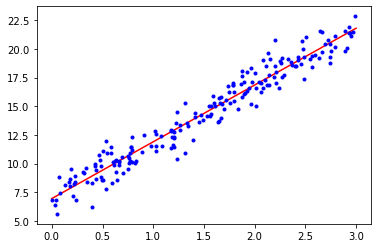

In [16]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

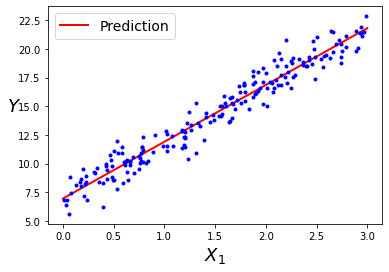

In [17]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label='Prediction')
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$Y$",rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis()

plt.show

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([6.9446812]), array([[4.95442992]]))

In [19]:
lin_reg.predict(X_new)

array([[ 6.9446812 ],
       [21.80797096]])

# 유사역행렬

In [21]:
#유사 역행렬
import scipy
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[6.9446812 ],
       [4.95442992]])

In [23]:
np.linalg.pinv(X_b).dot(y)

array([[6.9446812 ],
       [4.95442992]])

# 배치 경사 하강법을 사용한 선형 회귀

In [28]:
#Batch 경사하강법
eta=0.1
n_iterations=200
m=len(X)

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta= theta - eta*gradients    
theta

array([[6.94323071],
       [4.95522449]])

In [29]:
X_new_b.dot(theta)

array([[ 6.94323071],
       [21.80890417]])

# 확률적 경사 하강법

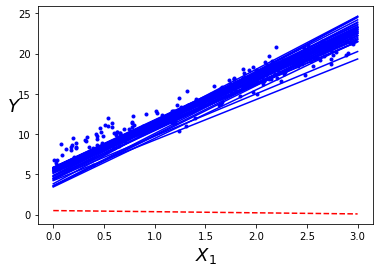

array([[6.95791145],
       [4.96419641]])

In [33]:
#확률적 경사하강법
theta_path_sgd=[]
m = len(X_b)
np.random.seed(42)


n_epochs=200
t0,t1=5,50

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i<40:
            y_predict = X_new_b.dot(theta)
            style='b-' if i>0 else 'r--'         
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)        
        xi = X_b[random_index:random_index+1]        
        yi = y[random_index:random_index+1]        
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        
        eta=learning_schedule(epoch*m + i)
        theta= theta - eta*gradients
        theta_path_sgd.append(theta)

plt.plot(X,y,"b.")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.show()
theta

In [35]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X,y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([6.9428608]), array([4.94885993]))

# 미니배치 경사 하강법

In [36]:
theta_path_mgd = []

n_iterations = 200
minibatch_size = 40

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m) #랜덤으로 섞은 배열을 다시 반환
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size] #하나씩이 아니고 batch size만큼 받는 것 
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
theta

array([[6.99538495],
       [5.04568475]])